# Titanic survival prediction

## Goal
Predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, predict a 0 or 1 value for the variable.

## Metric
The score is the percentage of passengers you correctly predict. 

In [3]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

There weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

This is a dataset of 481 passengers from RMS titanic

### Notebook Outline

* Setting env
* Collecting the data
* Exploratory data analysis
* Analysing Missing data
* Feature engineering
* Modelling
* Testing

## Setting Environment

#### Importing liblaries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Collecting data

In [28]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')
gender_data = pd.read_csv('data/gender_submission.csv')

VariableDefinitionKeysurvivalSurvival0 = No, 1 = YespclassTicket class1 = 1st, 2 = 2nd, 3 = 3rdsexSexAgeAge in yearssibsp# of siblings / spouses aboard the Titanicparch# of parents / children aboard the TitanicticketTicket numberfarePassenger farecabinCabin numberembarkedPort of EmbarkationC = Cherbourg, Q = Queenstown, S = Southampton

## Exploratory data analysis

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Searching for null/missing values in the dataset

In [31]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Conclusion

* 891 rows for test dataset and 418 rows for train dataset
* 70% of cabin data is missing, so cabin data can be ingnored in our analysis

### Dataset overview

In [33]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [34]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [35]:
gender_data.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [70]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)*100

print("Percentage of women who survived :", rate_women)
print("Percentage of men who survived   :", rate_men)

Percentage of women who survived : 74.20382165605095
Percentage of men who survived   : 18.890814558058924


* **74% women survived**
* **18% men survived**

## Graphs

### Survived passengers

<Axes: xlabel='Sex', ylabel='Survived'>

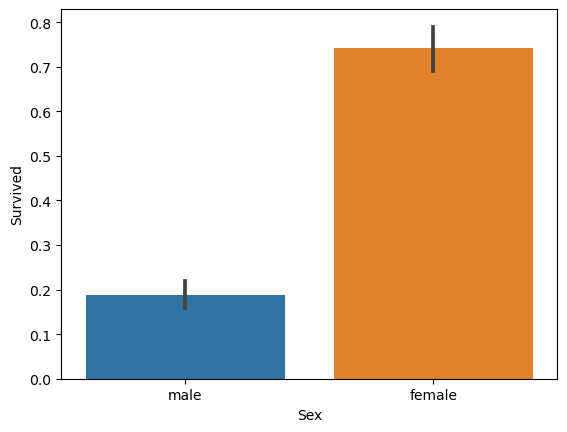

In [36]:
sns.barplot(x='Sex', y='Survived', data=train_data)

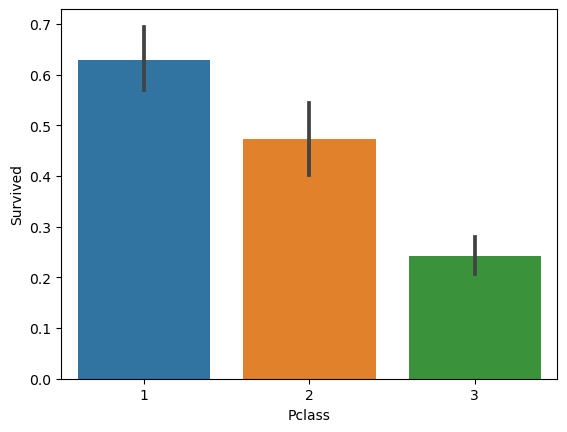

In [37]:
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.show()

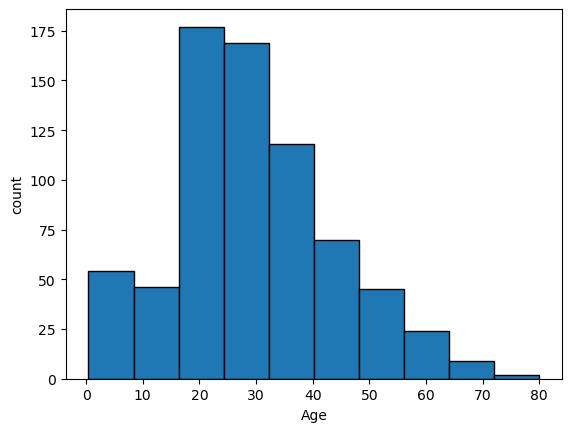

In [38]:
plt.hist(train_data.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

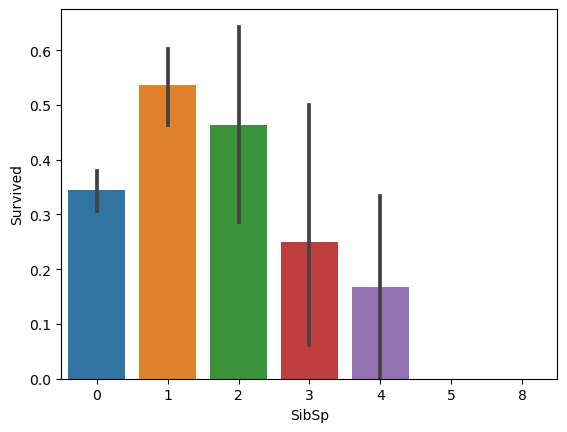

In [41]:
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.show()

In [42]:
train_data.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

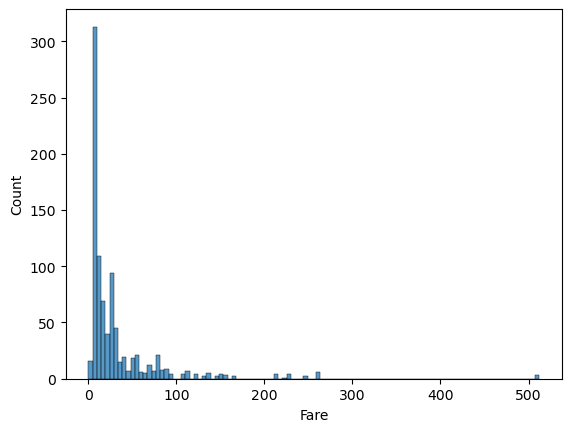

In [46]:
sns.histplot(train_data.Fare)
plt.show()

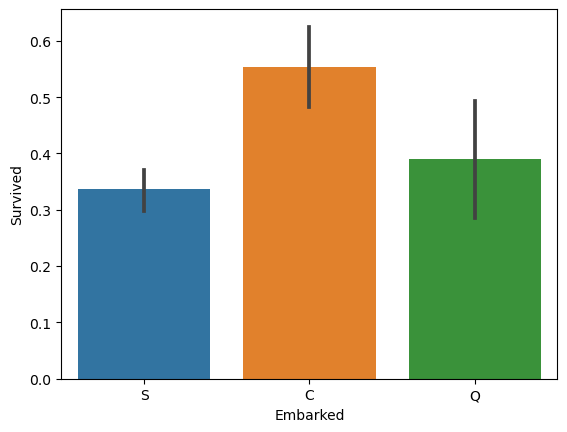

In [50]:
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.show()

In [64]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

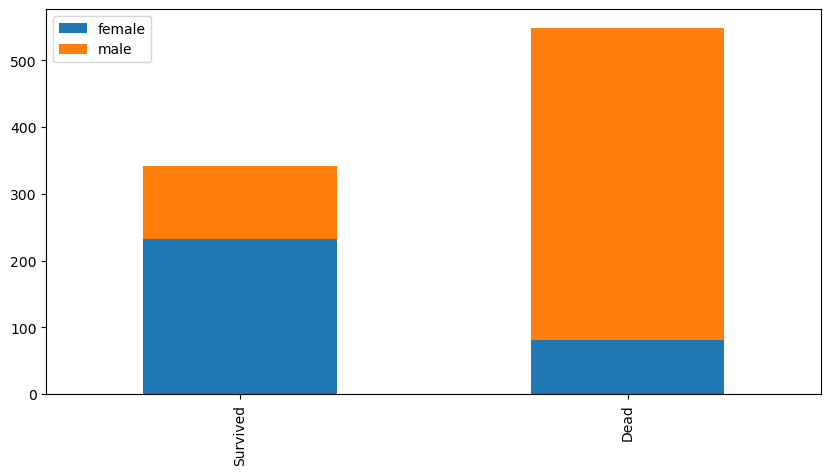

In [65]:
bar_chart('Sex')

**Women** are more likely to sururvive

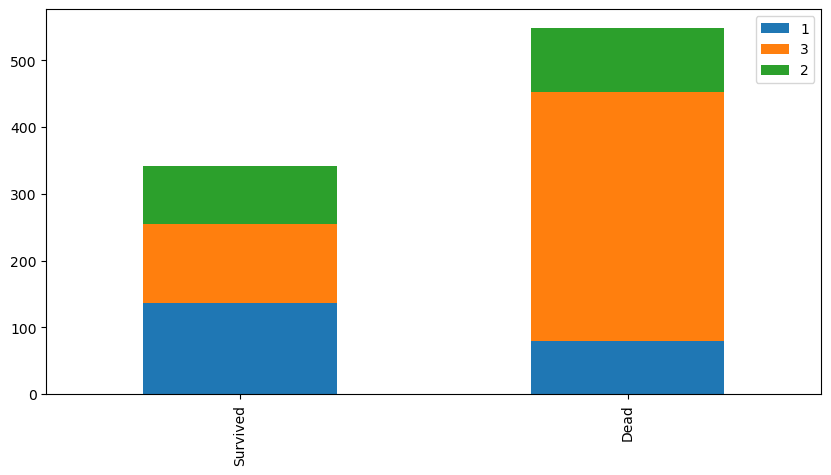

In [66]:
bar_chart('Pclass')

* Passengers from **1st** class are more likely to survive than others
* Passengers from **3rd** class are more likely dead than others

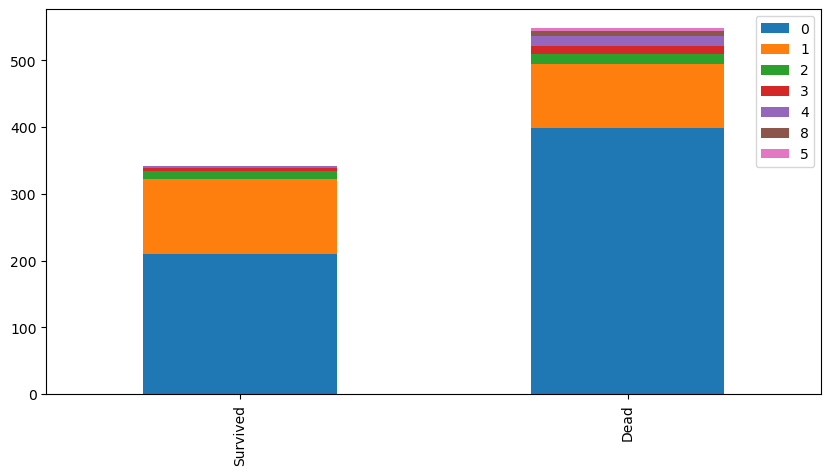

In [67]:
bar_chart('SibSp')

* The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived
* The Chart confirms **a person aboarded without siblings or spouse** more likely dead

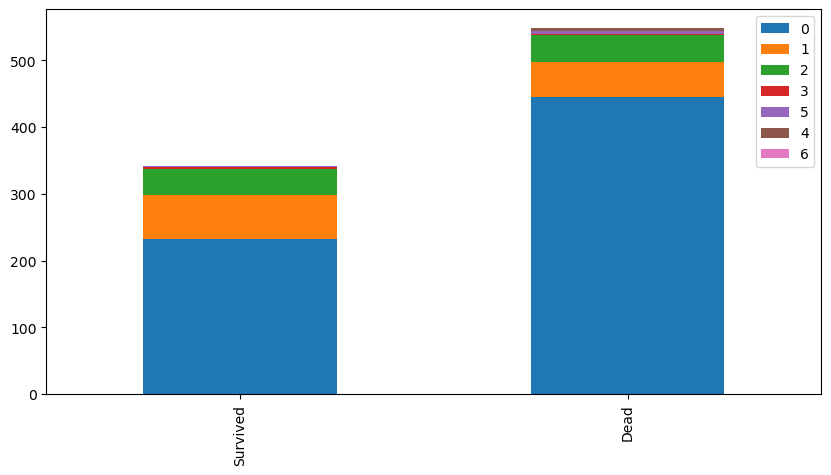

In [68]:
bar_chart('Parch')

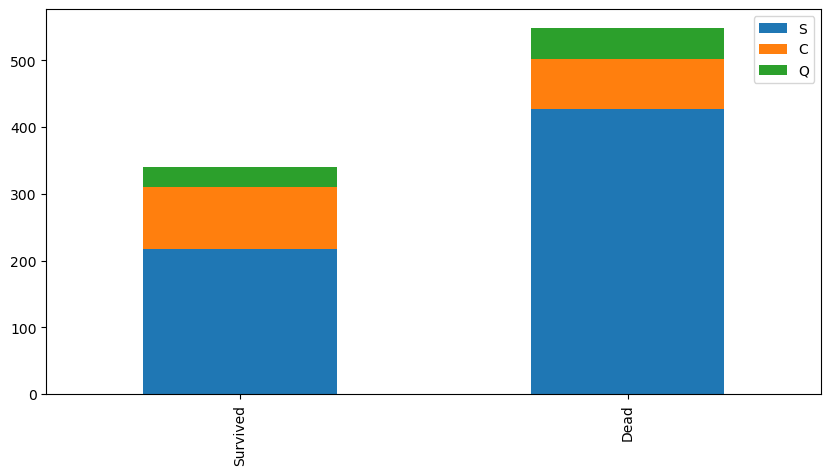

In [69]:
bar_chart('Embarked')

* The Chart confirms a person aboarded from **C** slightly more likely survived
* The Chart confirms a person aboarded from **Q & S** more likely dead

## Conclusions

1. Most of the passengers travel with 1 sibling/spouse.

2. Passengers having 1 sibling/spouse are more likely to survive compared to those not.

3. For those more than 1 siblings/spouses, the information is insufficient to provide any insight.

4. greater than 70% passengers travel without parents/children.

5. Passengers travelling with parents/children are more likely to survive than those not.

6. The distribution is right-skewed. Outliers are observed.

7. For those who survived, their fares are relatively higher.

8. Passengers embarked at Port C are more likely to survive.

9. greater than 2/3 passengers embarked at Port C.

## Missing Data

### Replacing missing data with substituted values

In [51]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
whole_data = train_data.append(test_data)
whole_data['Title'] = whole_data.Name.str.extract(r'([A-Za-z]+)\.', expand=False)
whole_data.Title.value_counts()

C:\Users\adity.LAPTOP-GNLCUQI0\AppData\Local\Temp\ipykernel_24352\828613453.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_data = train_data.append(test_data)


Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [60]:
AgeMedian_by_titles = train_data.groupby('Title')['Age'].median()
AgeMedian_by_titles

KeyError: 'Title'

## Feature engineering

## Modelling

## Testing